# Many neurons

This demo shows how to construct and manipulate a population of neurons.

These are 100 leaky integrate-and-fire (LIF) neurons.
The neuron tuning properties have been randomly selected.

The input is a sine wave to show the effects
of increasing or decreasing input.
As a population, these neurons do a good job
of representing a single scalar value.
This can be seen by the fact that
the input graph and neurons graphs match well.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.ensemble import sorted_neurons
from nengo.utils.matplotlib import rasterplot

## Step 1: Create the neural population

Our model consists of a single population of neurons.

In [2]:
model = nengo.Network(label='Many Neurons')
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(100, dimensions=1)

## Step 2: Create input for the model

We will use a sine wave as a continuously changing input.

In [3]:
with model:
    sin = nengo.Node(lambda t: np.sin(8 * t))  # Input is a sine

## Step 3: Connect the network elements

In [4]:
with model:
    # Connect the input to the population
    nengo.Connection(sin, A, synapse=0.01)  # 10ms filter

## Step 4: Probe outputs

Anything that is probed will collect the data it produces over time,
allowing us to analyze and visualize it later.

In [5]:
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=0.01)  # 10ms filter
    A_spikes = nengo.Probe(A.neurons)  # Collect the spikes

## Step 5: Run the model

In [6]:
# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

## Step 6: Plot the results

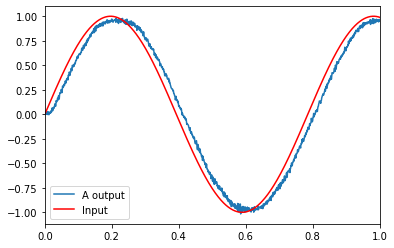

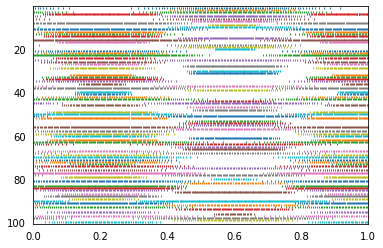

In [7]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], 'r', label="Input")
plt.xlim(0, 1)
plt.legend()

# Plot the spiking output of the ensemble
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes])
plt.xlim(0, 1);

The top graph shows the decoded response of the neural spiking.
The bottom plot shows the spike raster coming out of every 2nd neuron.

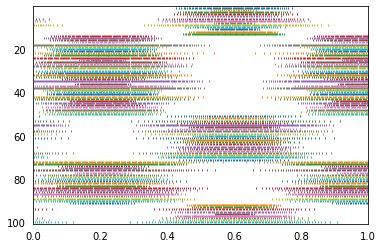

In [8]:
# For interest's sake, you can also sort by encoder
indices = sorted_neurons(A, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes][:, indices])
plt.xlim(0, 1);